<a href="https://colab.research.google.com/github/harshrupendrasingh/Makemore-2/blob/main/makemore_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
file_path = '/content/drive/MyDrive/names.txt'

words = open(file_path, 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [ ]:
len(words)

32033

In [ ]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0

itos = {i:s for s, i in stoi.items()}
print(stoi)
print(itos)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}
{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [ ]:
block_size = 3

x, y = [], []

for w in words[:5]:
#  print(w)

  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    x.append(context)
    y.append(ix)
 #   print(''.join(itos[i] for i in context), '---->', itos[ix])
    context = context[1:] + [ix]

X = torch.tensor(x)
Y = torch.tensor(y)


In [ ]:
C = torch.randn((27, 2))
C

tensor([[ 8.7927e-01,  4.7804e-01],
        [-1.4070e+00, -1.7433e+00],
        [-1.4846e+00, -5.6719e-01],
        [-6.0259e-01,  4.2873e-01],
        [ 1.2300e+00, -8.2585e-01],
        [-1.9010e-02,  1.3110e-01],
        [ 1.5049e+00, -1.8850e-01],
        [-1.0745e+00, -1.7074e+00],
        [ 2.7828e-01,  2.8609e-01],
        [ 1.1269e-01, -8.3772e-01],
        [ 2.8972e-01, -1.7442e+00],
        [ 8.0030e-01,  7.2558e-01],
        [ 1.6065e+00,  4.8285e-01],
        [-3.4483e-01, -2.8918e-01],
        [-2.1505e-01,  2.4885e-02],
        [-8.4543e-02, -1.1712e-01],
        [-1.3939e-01, -2.4444e+00],
        [-3.8018e-01,  5.9177e-01],
        [-9.8232e-01,  4.4255e-01],
        [ 7.4521e-01, -5.6644e-01],
        [-5.6222e-01,  9.5105e-02],
        [-2.1958e-02,  1.0034e+00],
        [ 6.6789e-01, -2.9627e-01],
        [ 8.3752e-01, -3.0169e-01],
        [ 1.4626e+00, -9.8253e-01],
        [-1.1149e+00, -7.5262e-01],
        [-8.4893e-04, -4.7683e-01]])

In [ ]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [ ]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [ ]:
#trying to change the shape of emb so that it can multiply with the w
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([32, 6])

In [ ]:
#this one works veen if we change the bolck_size
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [ ]:
#more ways
#better that the previour
emb.view(32, 6)

tensor([[ 0.8793,  0.4780,  0.8793,  0.4780,  0.8793,  0.4780],
        [ 0.8793,  0.4780,  0.8793,  0.4780, -0.0190,  0.1311],
        [ 0.8793,  0.4780, -0.0190,  0.1311, -0.3448, -0.2892],
        [-0.0190,  0.1311, -0.3448, -0.2892, -0.3448, -0.2892],
        [-0.3448, -0.2892, -0.3448, -0.2892, -1.4070, -1.7433],
        [ 0.8793,  0.4780,  0.8793,  0.4780,  0.8793,  0.4780],
        [ 0.8793,  0.4780,  0.8793,  0.4780, -0.0845, -0.1171],
        [ 0.8793,  0.4780, -0.0845, -0.1171,  1.6065,  0.4828],
        [-0.0845, -0.1171,  1.6065,  0.4828,  0.1127, -0.8377],
        [ 1.6065,  0.4828,  0.1127, -0.8377,  0.6679, -0.2963],
        [ 0.1127, -0.8377,  0.6679, -0.2963,  0.1127, -0.8377],
        [ 0.6679, -0.2963,  0.1127, -0.8377, -1.4070, -1.7433],
        [ 0.8793,  0.4780,  0.8793,  0.4780,  0.8793,  0.4780],
        [ 0.8793,  0.4780,  0.8793,  0.4780, -1.4070, -1.7433],
        [ 0.8793,  0.4780, -1.4070, -1.7433,  0.6679, -0.2963],
        [-1.4070, -1.7433,  0.6679, -0.2

In [ ]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
h.shape

torch.Size([32, 100])

In [ ]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [ ]:
logits = h @ W2 + b2
logits.shape

torch.Size([32, 27])

In [ ]:
counts = logits.exp()

In [ ]:
prob = counts / counts.sum(1, keepdim=True)
prob.shape

torch.Size([32, 27])

rewrite everything but better


In [ ]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [ ]:
X.shape, Y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [ ]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [ ]:
for p in parameters:
  p.requires_grad = True

In [ ]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [ ]:
lri = []
lossi = []
stepi = []

In [ ]:
for i in range(200000):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())

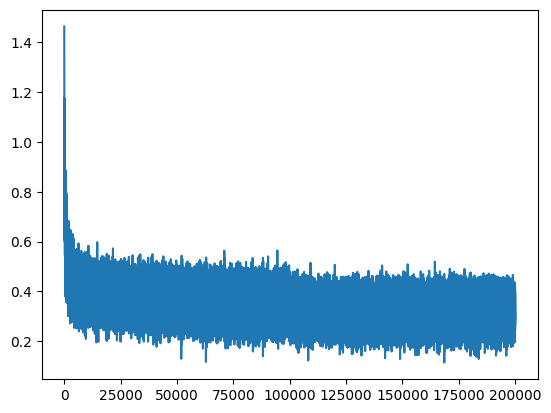

In [ ]:
plt.plot(stepi, lossi)

In [ ]:
# training loss
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1239, grad_fn=<NllLossBackward0>)

In [ ]:
# validation loss
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1598, grad_fn=<NllLossBackward0>)

In [ ]:
# test loss
emb = C[Xte] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Yte)
loss

tensor(2.1643, grad_fn=<NllLossBackward0>)

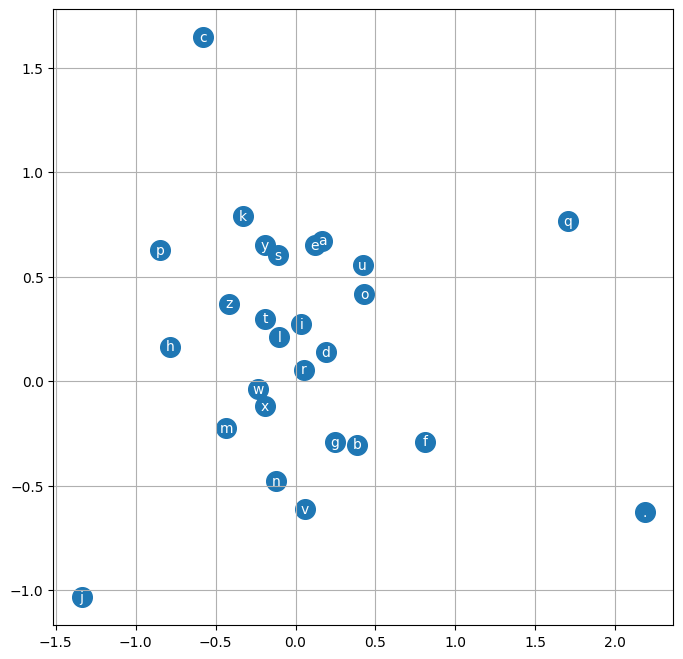

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [ ]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break

    print(''.join(itos[i] for i in out))

mora.
mayah.
seel.
nihah.
lorethruthadrie.
cadered.
eliigh.
poppire.
eliean.
nar.
kayzion.
kamin.
shubergiag.
jest.
jair.
jelipenteron.
uma.
ged.
ryyah.
fael.
